Machine learning Project-

First of all Explaning all five questions


1. Your views about the problem statement?


(I have answered it after training the model , finding the best model and doing all tasks)
The problem statement involves building a machine learning model to predict the salary of newly hired employees based on given data. This is a common task which can provide valuable insights for companies in determining appropriate salary levels for different positions. By using machine learning techniques, we can analyze various factors such as college tier, city, role, and other relevant features to make accurate salary predictions.

##### 2. What will be your approach to solving this task?

My approach to solving this task would involve the following steps:

Data Understanding: Understand the structure and contents of the dataset provided, including the features and target variable.
Data Cleaning: Handle missing values, outliers, and inconsistencies in the data.
Feature Engineering: Convert categorical variables like college, city, and role into numerical format and create dummy variables for the "Role" feature.
Exploratory Data Analysis (EDA): Explore the relationships between different features and the target variable using visualizations.
Model Selection: Choose suitable regression models for salary prediction, such as Linear Regression, Decision Trees, Random Forest, etc.
Model Training: Train multiple regression models on the training data and evaluate their performance.
Model Evaluation: Assess the performance of each model using appropriate evaluation metrics such as Mean Squared Error (MSE), R-squared, etc.
Model Tuning: Fine-tune the selected model to improve its performance further if necessary.
Final Model Deployment: Deploy the best-performing model for making salary predictions on new data.

##### 3. What were the available ML model options you had to perform this task?


Linear Regression
Decision Tree Regression
Random Forest Regression
Gradient Boosting Regression

Each of these models has its strengths and weaknesses, and the choice depends on factors such as the nature of the data, the complexity of the problem, and the interpretability of the model.

##### 4. Which model’s performance is best and what could be the possible reason for that?

##### 5. What steps can you take to improve this selected model’s performance even further?

### Importing and Merging Data

In [1]:
import pandas as pd

# Load datasets
ml_data = pd.read_csv("C:/Users/Ideapad Gaming 3/Desktop/ML case Study.csv")
colleges_data = pd.read_csv("C:/Users/Ideapad Gaming 3/Desktop/Colleges.csv")
cities_data = pd.read_csv("C:/Users/Ideapad Gaming 3/Desktop/cities.csv",header=0)



In [2]:
cities_data.head()

Metro_city non_metro_cities
0     Mumbai         Dehradun
1      Delhi         Durgapur
2    Kolkata          Asansol
3    Chennai         Rourkela
4  Bangalore        Kozhikode

In [3]:
colleges_data.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [4]:
# Merging the college data in ml_data
Tier1=colleges_data["Tier 1"].tolist()

Tier2=colleges_data["Tier 2"].tolist()

Tier3=colleges_data["Tier 3"].tolist()

 
for item in ml_data.College:

    if item in Tier1:

        ml_data["College"].replace(item, 1 ,inplace=True)

    elif item in Tier2:

        ml_data["College"].replace(item, 2 ,inplace=True)

    elif item in Tier3:

        ml_data["College"].replace(item, 3 ,inplace=True)


In [5]:
ml_data=ml_data

In [6]:
# Extract metro and non-metro city lists
metro_cities = cities_data["Metro_city"].tolist()
non_metro_cities = cities_data["non_metro_cities"].tolist()

# Replace city values in ml_data
for index, item in enumerate(ml_data["City"]):
    if item in metro_cities:
        ml_data.at[index, "City"] = 1
    elif item in non_metro_cities:
        ml_data.at[index, "City"] = 0

# Check the modified dataset
print(ml_data.head())


   College City       Role  Previous CTC  Previous job change  \
0        2    0    Manager       55523.0                    3   
1        2    0  Executive       57081.0                    1   
2        3    0  Executive       60347.0                    2   
3        3    0  Executive       49010.0                    2   
4        1    0  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  


In [7]:
cities_data

Metro_city non_metro_cities
0     Mumbai         Dehradun
1      Delhi         Durgapur
2    Kolkata          Asansol
3    Chennai         Rourkela
4  Bangalore        Kozhikode
5  Hyderabad  Rajpur Sonarpur
6  Ahmedabad         Kolhapur
7       Pune            Ajmer
8      Surat              NaN

In [8]:
print(cities_data.columns)

Index(['Metro_city', 'non_metro_cities'], dtype='object')


In [9]:
ml_data

College City       Role  Previous CTC  Previous job change  \
0           2    0    Manager       55523.0                    3   
1           2    0  Executive       57081.0                    1   
2           3    0  Executive       60347.0                    2   
3           3    0  Executive       49010.0                    2   
4           1    0  Executive       57879.0                    4   
...       ...  ...        ...           ...                  ...   
1584        1    1  Executive       61285.0                    3   
1585        1    0  Executive       63140.0                    1   
1586        1    1  Executive       44907.0                    1   
1587        1    0  Executive       52054.0                    2   
1588        2    1    Manager       44353.0                    3   

      Graduation Marks  EXP (Month)       CTC  
0                   66           19  71406.58  
1                   84           18  68005.87  
2                   52           28  76764.02  
3                   81           33  82092.39  
4                   74           32  73878.10  
...                ...          ...       ...  
1584                44           60  77283.59  
1585                44           24  68416.86  
1586                60           19  70186.19  
1587                67           29  73394.09  
1588                75           18  70056.31  

[1589 rows x 8 columns]

In [10]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Role" column
ml_data['Role'] = label_encoder.fit_transform(ml_data['Role'])

# Check the modified dataset
print(ml_data.head())


   College City  Role  Previous CTC  Previous job change  Graduation Marks  \
0        2    0     1       55523.0                    3                66   
1        2    0     0       57081.0                    1                84   
2        3    0     0       60347.0                    2                52   
3        3    0     0       49010.0                    2                81   
4        1    0     0       57879.0                    4                74   

   EXP (Month)       CTC  
0           19  71406.58  
1           18  68005.87  
2           28  76764.02  
3           33  82092.39  
4           32  73878.10  


In [11]:
ml_data.describe()

College         Role  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     0.206419  55518.453744             2.528634   
std       0.838330     0.404862   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     0.000000  55291.000000             3.000000   
75%       3.000000     0.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  
count       1589.000000  1589.000000    1589.000000  
mean          59.855255    39.044682   75353.278798  
std           14.935139    14.108875   12587.288237  
min           35.000000    18.000000   53020.320000  
25%           46.000000    26.000000   66902.350000  
50%           60.000000    39.000000   73028.670000  
75%           73.000000    51.000000   80588.670000  
max           85.000000    64.000000  123416.990000

In [12]:
# Save ml_data to a CSV file
ml_data.to_csv('ml_data.csv', index=False)

# Create a download link in Jupyter Notebook
from IPython.display import FileLink
FileLink('ml_data.csv')

#Downloaded ML data and saved it as ml_data

c:\Users\Ideapad Gaming 3\Desktop\ml_data.csv

### (Data Preprocessing) :Treating Missing Values and Outliers

In [13]:
ml_data.describe()

College         Role  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     0.206419  55518.453744             2.528634   
std       0.838330     0.404862   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     0.000000  55291.000000             3.000000   
75%       3.000000     0.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  
count       1589.000000  1589.000000    1589.000000  
mean          59.855255    39.044682   75353.278798  
std           14.935139    14.108875   12587.288237  
min           35.000000    18.000000   53020.320000  
25%           46.000000    26.000000   66902.350000  
50%           60.000000    39.000000   73028.670000  
75%           73.000000    51.000000   80588.670000  
max           85.000000    64.000000  123416.990000

In [14]:
print(ml_data.isnull().sum())


College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64


In [15]:
ml_data.describe()

College         Role  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     0.206419  55518.453744             2.528634   
std       0.838330     0.404862   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     0.000000  55291.000000             3.000000   
75%       3.000000     0.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  
count       1589.000000  1589.000000    1589.000000  
mean          59.855255    39.044682   75353.278798  
std           14.935139    14.108875   12587.288237  
min           35.000000    18.000000   53020.320000  
25%           46.000000    26.000000   66902.350000  
50%           60.000000    39.000000   73028.670000  
75%           73.000000    51.000000   80588.670000  
max           85.000000    64.000000  123416.990000

In [16]:
ml_data.dropna(inplace=True)

In [17]:
ml_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   int32  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 93.2+ KB


In [18]:
import pandas as pd

# Load the DataFrame from the CSV file
ml_data = pd.read_csv("C:/Users/Ideapad Gaming 3/Desktop/ml_data.csv")

# Drop rows with missing values in the "City" column
ml_data.dropna(subset=['City'], inplace=True)


<Axes: >

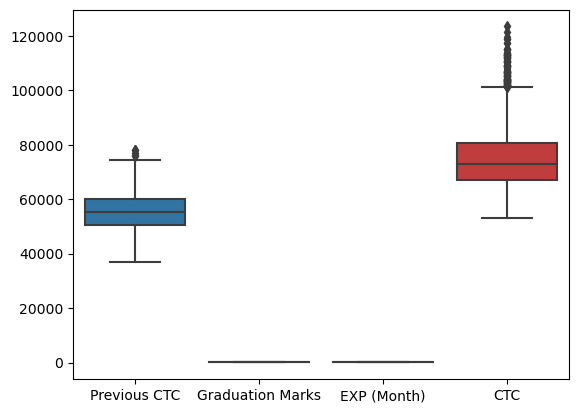

In [19]:
import seaborn as sns
# Define numerical features
numerical_features = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']

# Plot box plots for numerical features
sns.boxplot(data=ml_data[numerical_features])

In [20]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   int64  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


### Drawing graphs to check Outliers

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt


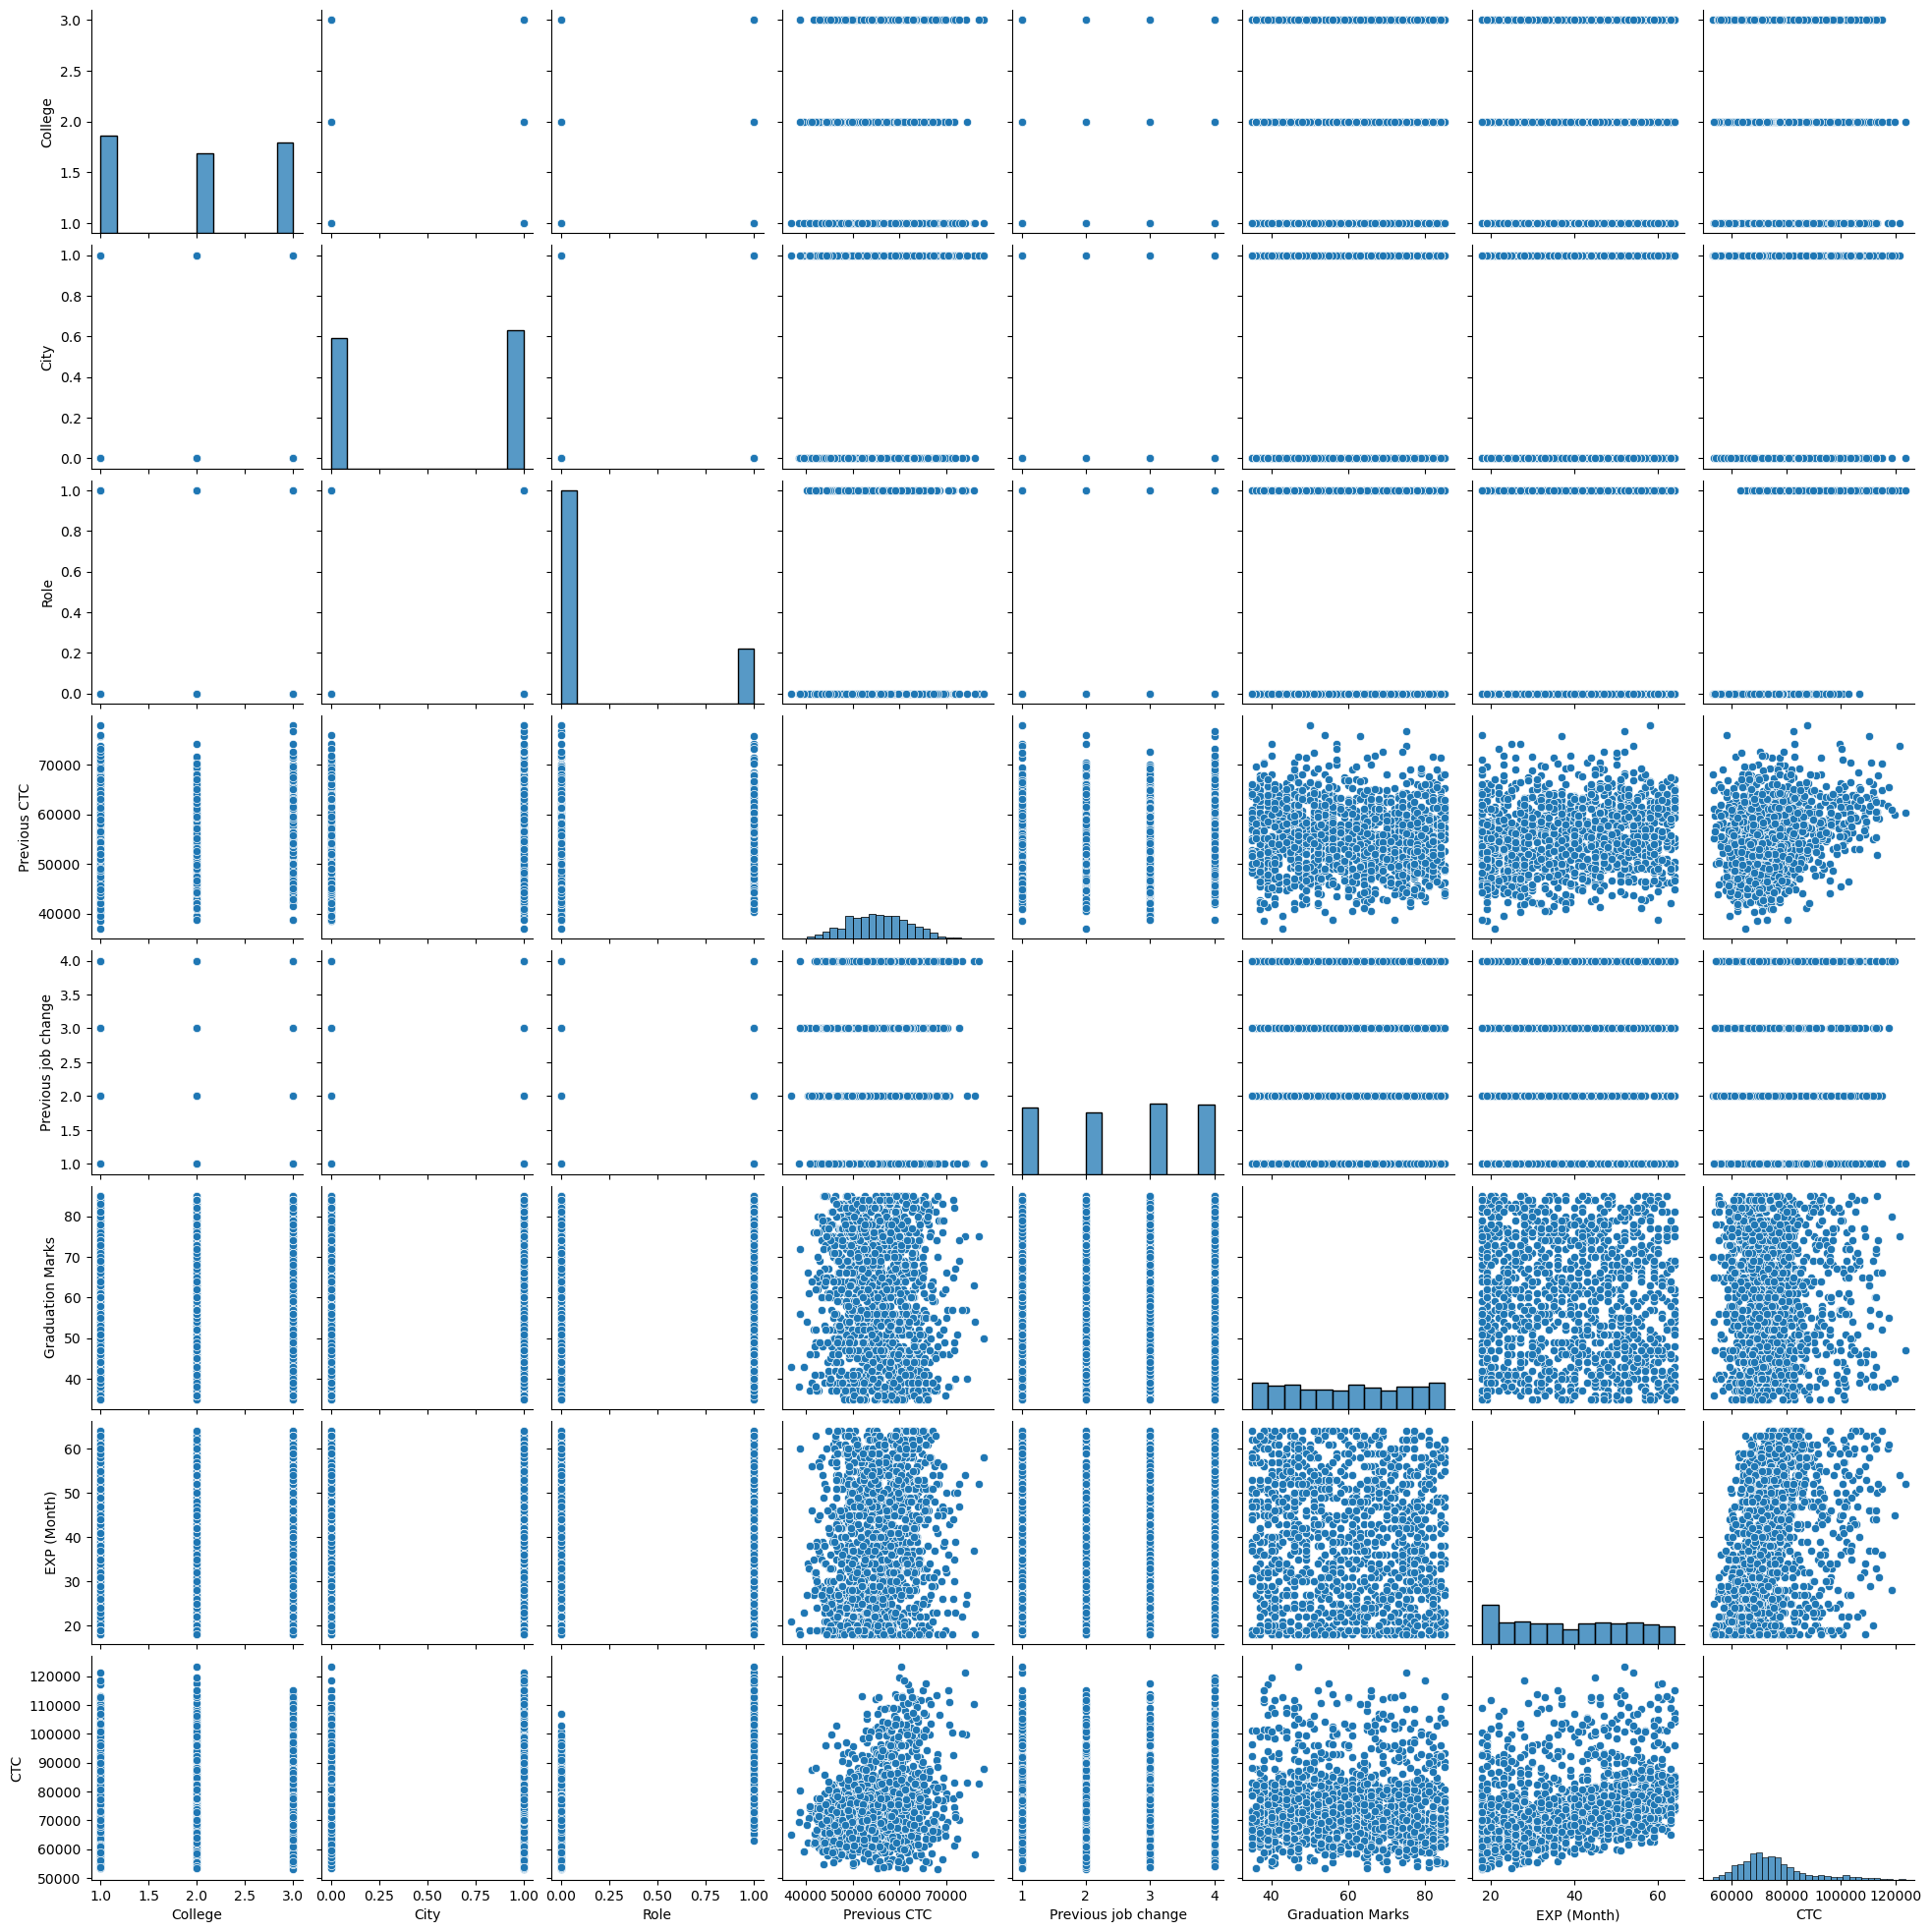

In [22]:
sns.pairplot(ml_data)
plt.show()

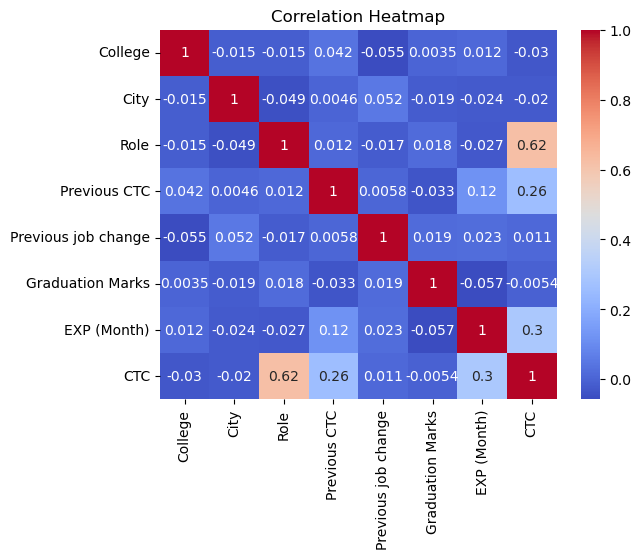

In [23]:
corr_matrix = ml_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

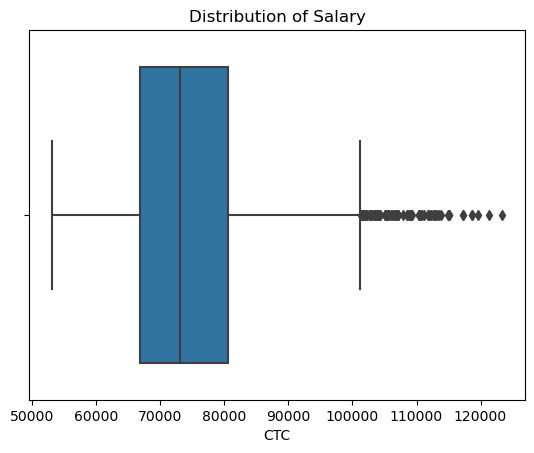

In [24]:
sns.boxplot(x='CTC', data=ml_data)
plt.title('Distribution of Salary')
plt.show()


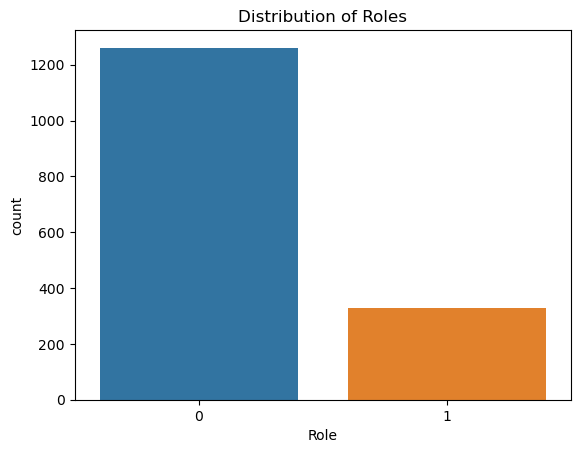

In [25]:
sns.countplot(x='Role', data=ml_data)
plt.title('Distribution of Roles')
plt.show()

### Model Training and Evaluation - Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Split the data into features (X) and target variable (y)
X = ml_data.drop(columns=['CTC'], axis=1)
y = ml_data['CTC']


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
X_train.shape, X_test.shape

((1271, 7), (318, 7))

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([69231.72415332, 64369.7680116 , 63321.52894358, 72171.15377139,
       76841.11084455, 88922.98045817, 69394.26682361, 71543.20163684,
       71111.40245528, 73779.30554514, 71863.88535278, 78218.13942319,
       85585.57928094, 78269.59273611, 77260.57346607, 93653.46597938,
       65996.69709023, 68651.68307647, 66852.55414909, 81440.49342702,
       91373.33455548, 96249.80944793, 71342.71307915, 67626.45843994,
       72748.90885076, 67870.46091105, 73778.41014508, 94199.53483492,
       72283.17837544, 74553.62754856, 68573.42274174, 69556.90861571,
       85135.92567059, 80182.70546167, 98399.5041543 , 79968.40167081,
       71508.94310856, 80931.42977765, 73626.03449167, 65914.65532155,
       71615.17756767, 88079.03869137, 73177.33402675, 67986.86464097,
       75117.21268264, 78379.16569092, 86672.93845851, 67780.834833  ,
       69599.56986409, 76799.4946273 , 90349.85076278, 69913.33833866,
       91760.55217206, 72754.10440811, 90055.45992165, 69596.44608169,
      

In [32]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 68909870.69952632


### Visualization of Predictions vs. Actual Values

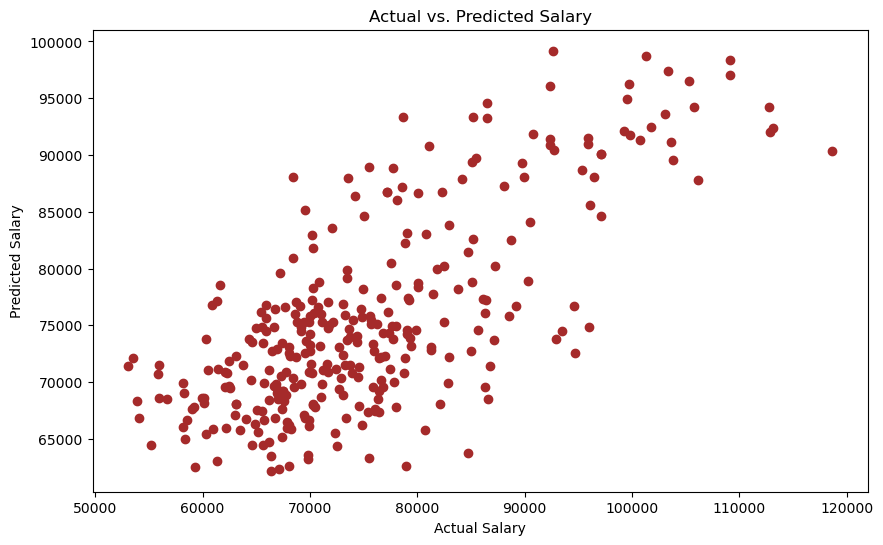

In [33]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='brown')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


In [34]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.5355989894790043


### Adjusted R2 score 

In [35]:
from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Calculate the number of samples (n) and predictors (k)
n = len(y_test)
k = X_test.shape[1]

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("Adjusted R-squared (R2) Score:", adjusted_r2)


Adjusted R-squared (R2) Score: 0.525112515047885


### Training Model through Decision Tree Regression

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
import graphviz


In [37]:
# Train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=3, random_state=0)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=0)

In [38]:
# Visualize the Decision Tree
dot_data = export_graphviz(dt_model, out_file=None, 
                            feature_names=X.columns,   
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree_visualization", format='png')  # Save visualization as PNG file
graph.view()  
# Display the visualization in the notebook

'decision_tree_visualization.pdf'

In [39]:
# Evaluate the model
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 60424631.02613475
R-squared Score: 0.5927831611924911


# Model Training - Random Forest Regression

In [40]:
# Model Selection and Training (Random Forest Regression)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Step 5: Regularization (L2 - Ridge Regression)
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [41]:
# Define the pipeline with StandardScaler and Ridge Regression
ridge_model_with_regularization = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1, random_state=0))
])


In [42]:
# Train the Ridge Regression model with regularization
ridge_model_with_regularization.fit(X_train, y_train)

# Step 6: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Evaluate Random Forest Regression model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Regression - MSE:", rf_mse)
print("Random Forest Regression - R-squared:", rf_r2)

Random Forest Regression - MSE: 51354279.03326515
Random Forest Regression - R-squared: 0.6539105525010156


In [44]:
# Evaluate Ridge Regression model with regularization
ridge_predictions = ridge_model_with_regularization.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression with Regularization - MSE:", ridge_mse)
print("Ridge Regression with Regularization - R-squared:", ridge_r2)

Ridge Regression with Regularization - MSE: 68910287.67231624
Ridge Regression with Regularization - R-squared: 0.5355961793941351


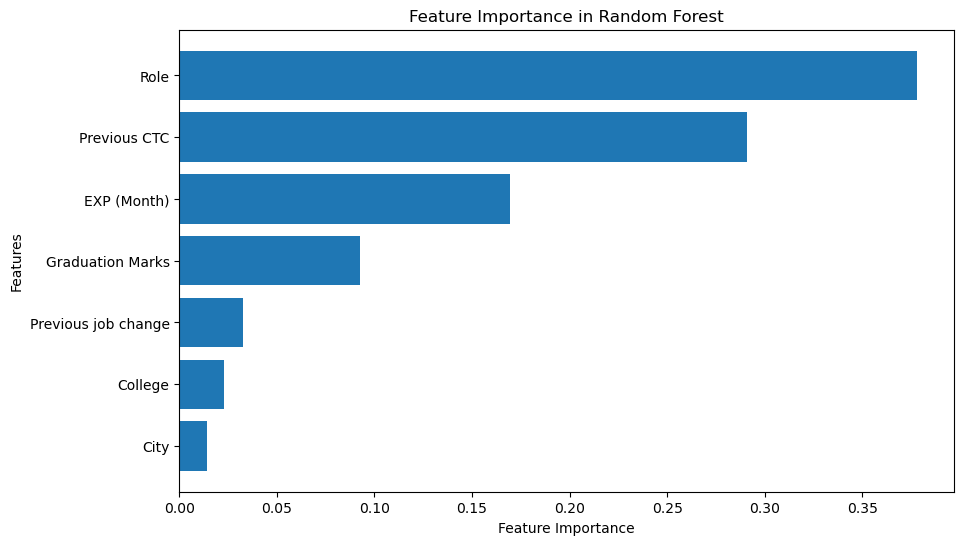

In [45]:
import numpy as np
# Feature Importance Visualization
feature_importance = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_indices], feature_importance[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

###  Model Training - Gradient Boosting Regression

In [46]:
#  Model Training (Gradient Boosting Regression)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [47]:
# Train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [48]:
# Make predictions
y_pred = gb_model.predict(X_test)

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 57548746.36063162
R-squared Score: 0.6121644737859375


In [50]:
# : Model Tuning (Hyperparameter Optimization)
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

In [51]:
# Perform Grid Search CV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [52]:
# Re-train the model with best parameters
best_gb_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_gb_model.predict(X_test)


In [53]:
# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Best Model Mean Squared Error:", mse_best)
print("Best Model R-squared Score:", r2_best)


Best Model Mean Squared Error: 57549125.269158944
Best Model R-squared Score: 0.6121619202257407


### Comparing the model to get best model:

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "gb_model" :GradientBoostingRegressor(random_state=0),
   " rf_model" : RandomForestRegressor(random_state=0)
}

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print("="*50)


Model: Linear Regression
Mean Squared Error: 68909870.69952632
R2 Score: 0.5355989894790043
Model: Random Forest
Mean Squared Error: 50462180.77042395
R2 Score: 0.6599226278472885
Model: Decision Tree
Mean Squared Error: 95082734.59013146
R2 Score: 0.35921345405948923
Model: gb_model
Mean Squared Error: 57548746.36063162
R2 Score: 0.6121644737859375
Model:  rf_model
Mean Squared Error: 51354279.03326515
R2 Score: 0.6539105525010156


In [56]:
# Compare models based on evaluation metrics and select the best one
# The model with the lowest MSE and highest R2 score is considered the best
# For demonstration, let's assume Random Forest performs the best

best_model = models["Random Forest"]


### Regression Using Statsmodel

In [57]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [58]:
# Add Constant to the Training Data
X_train = sm.add_constant(X_train)

In [59]:
# Linear Regression with Statsmodels
linear_reg = sm.OLS(y_train, X_train)

In [60]:
linear_reg_results = linear_reg.fit()

In [61]:
# Statsmodels Summary
print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     206.0
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          7.92e-204
Time:                        15:51:42   Log-Likelihood:                -13328.
No. Observations:                1271   AIC:                         2.667e+04
Df Residuals:                    1263   BIC:                         2.671e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.699e+04   2